## One-Dimensional Linear Regression
This demo generates data 

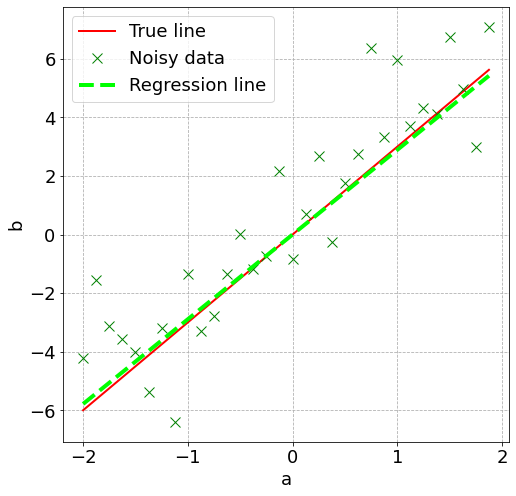

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size':18})

x = 3 # True slope of generated data
a = np.arange(-2, 2, 0.125)
a = a.reshape(-1, 1)
b = x*a + np.random.randn(*a.shape)*1.5 # Add random noise

plt.plot(a, x*a, Color='r', LineWidth=2, label='True line') # Plot the true line
plt.plot(a, b, 'x', Color='g', MarkerSize=10, label='Noisy data') # Plot noisy data

U, S, VT = np.linalg.svd(a, full_matrices=False)
x_tilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # Generate least-squares fit

plt.plot(a, x_tilde*a, '--', Color='lime', LineWidth=4, label='Regression line')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()

In [2]:
# There is another way to compute the regression line (Calculate pseudoinverse directly)

x_tilde = np.linalg.pinv(a) @ b

c:\users\17175\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


## Multilinear Regression Example

In [5]:
import pandas as pd

In [6]:
# Import the data from CSV file
df = pd.read_csv('hald_data.csv')
df

,tricalcium aluminate,tricalcium silicate,tetracalcium aluminoferrite,beta-dicalcium silicate,heat (cal/gm)
0,7,26,6,60,78.5
1,1,29,15,52,74.3
2,11,56,8,20,104.3
3,11,31,8,47,87.6
4,7,52,6,33,95.9
5,11,55,9,22,109.2
6,3,71,17,6,102.7
7,1,31,22,44,72.5
8,2,54,18,22,93.1
9,21,47,4,26,115.9


In [7]:
# Extract data into appropriate data matrices
A = df.iloc[:,0:4].to_numpy()
b = df.iloc[:,4:].to_numpy()

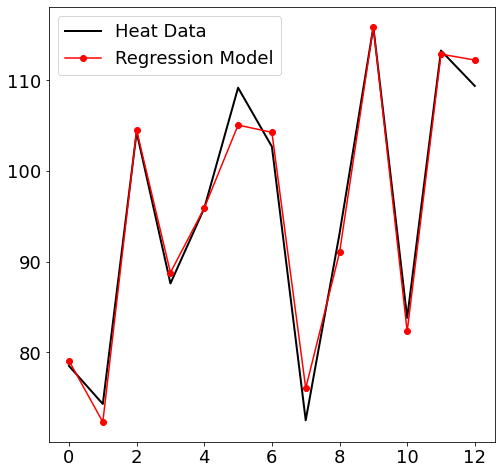

In [8]:
# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

plt.plot(b, Color='k', LineWidth=2, label='Heat Data') # Plot true relation
plt.plot(A@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression Model')
plt.legend()
plt.show()